# Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [2]:
data_url ='https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv'
dataframe = pd.read_csv(data_url)
dataframe.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


**Data Wrangling and Spliting**

In [3]:
features = dataframe.drop(['stab', 'stabf'], axis = 1)
target = dataframe['stabf']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=1)

**Feature Scaling**

In [4]:
sc = StandardScaler()

x_train = pd.DataFrame(sc.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(sc.transform(x_test), columns=x_test.columns)

# Quiz Questions

In [5]:
print('Question 1\n')

precision = 355/(355 + 1480)
recall = 355/(355 + 45)

f1_score = 2*(precision*recall)/(precision + recall)

print('F1 score =', round(f1_score, 4))

Question 1

F1 score = 0.3177


In [6]:
print('Question 4\n')

# Option A
print(f'Recall = {82 / (82 + 18)}')
print(f'False Positive Rate = {2 / (2 + 98)}')
print(f'Costs = {5 * 2 + 18}\n')

# Option B
print(f'Recall = {90 / (90 + 10)}')
print(f'False Positive Rate = {4 / (4 + 96)}')
print(f'Costs = {5 * 4 + 10} \n')

# Option C
print(f'Recall for = {79 / (79 + 21)}')
print(f'False Positive Rate = {round(1 / (1 + 91), 2)}')
print(f'Costs = {5 * 1 + 21} \n')

# Option D
print(f'Recall = {78 / (78 + 22)}')
print(f'False Positive Rate = {9 / (9 + 91)}')
print(f'Costs = {5 * 9 + 22} \n')

Question 4

Recall = 0.82
False Positive Rate = 0.02
Costs = 28

Recall = 0.9
False Positive Rate = 0.04
Costs = 30 

Recall for = 0.79
False Positive Rate = 0.01
Costs = 26 

Recall = 0.78
False Positive Rate = 0.09
Costs = 67 



In [7]:
print('Question 14\n')

forest_classifier = RandomForestClassifier(random_state=1)
forest_classifier.fit(x_train, y_train)

forest_predicted = forest_classifier.predict(x_test)

accuracy_value = round(accuracy_score(y_test, forest_predicted), 4)
print(f'Accuracy score = {accuracy_value}')

Question 14

Accuracy score = 0.929


In [8]:
print('Question 15\n')

xgb_classifier = XGBClassifier(random_state=1)
xgb_classifier.fit(x_train, y_train)

xgb_predicted = xgb_classifier.predict(x_test)

accuracy_value = round(accuracy_score(y_test, xgb_predicted), 4)
print(f'Accuracy score = {accuracy_value}')

Question 15

Accuracy score = 0.9195


In [9]:
print('Question 16\n')

lgbm_classifier = LGBMClassifier(random_state=1)
lgbm_classifier.fit(x_train, y_train)

lgbm_predicted = lgbm_classifier.predict(x_test)

accuracy_value = round(accuracy_score(y_test, lgbm_predicted), 4)
print(f'Accuracy score = {accuracy_value}')

Question 16

Accuracy score = 0.9375


In [10]:
print('Question 17\n')

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

ext_classifier = ExtraTreesClassifier(random_state=1)
randomised_grid_search = RandomizedSearchCV(ext_classifier, param_distributions= hyperparameter_grid,
                                scoring='accuracy',
                                n_iter=10,
                                cv=5,
                                n_jobs=-1,
                                verbose=1, 
                                random_state=1)

randomised_grid_search.fit(x_train, y_train)

Question 17

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                        

In [11]:
randomised_grid_search.best_params_

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [12]:
print('Question 18\n')

ext_classifier.fit(x_train, y_train)
old_accuracy = round(accuracy_score(y_test, ext_classifier.predict(x_test)), 4)
print(f'Old accuracy score = {old_accuracy}')

new_model = randomised_grid_search.best_estimator_
new_model.fit(x_train, y_train)

new_predicted = new_model.predict(x_test)
print(f'New Accuracy score = {round(accuracy_score(y_test, new_predicted), 4)}')

Question 18

Old accuracy score = 0.928
New Accuracy score = 0.927


Question 20



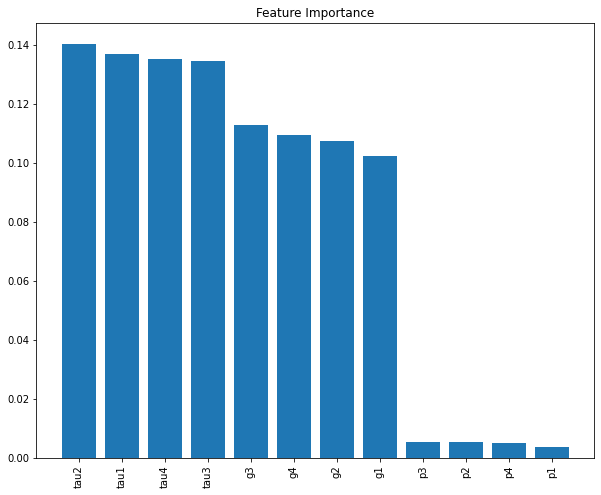

In [13]:
print('Question 20\n')

feature_importances = new_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [x_train.columns[i] for i in indices]

plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), feature_importances[indices])
plt.xticks(range(x_train.shape[1]), names, rotation=90)

plt.show()